In [1]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

"""**Reading informations in the Dataset**"""

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


In [2]:
spam = pd.read_csv("/content/drive/My Drive/Oasis Infobyte/Data Science - Internship/Email-Spam-Detection/spam.csv", encoding='ISO-8859-1')

"""**Checking for null values in Data**"""

spam.isnull().sum()

"""**Checking the First Five Values in the Data**"""

spam.head()

"""**Checking the Last Five Values in the Data**"""

spam.tail()

"""**Taking the required Columns in the Dataset**"""

spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

"""**Dimensions of the Dataset**"""

spam.shape

"""**Checking for the classes in the Data**"""

spam.groupby('label').size()

,0
label,
ham,4825
spam,747


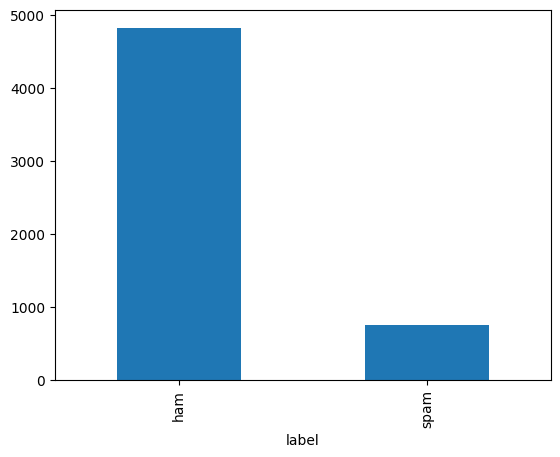

In [3]:
"""### Plotting

**Plotting the Label in the Dataset**
"""

spam['label'].value_counts().plot(kind='bar')

"""### NLP

**Preprocessing the Text in the Dataset**
"""

ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

"""**Creating Bag of Words Model**"""

cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

Random Forest Classifier
Confusion Matrix: 
[[964   1]
 [ 28 122]]
Accuracy:  0.9739910313901345
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[957   8]
 [ 22 128]]
Accuracy:  0.9730941704035875
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582
Classification Report for RFC 
               precision    recall  f1-score   support

       False       0.97      1.00      0.99       965
        True       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for DTC 
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       965
        True       0.94      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92  

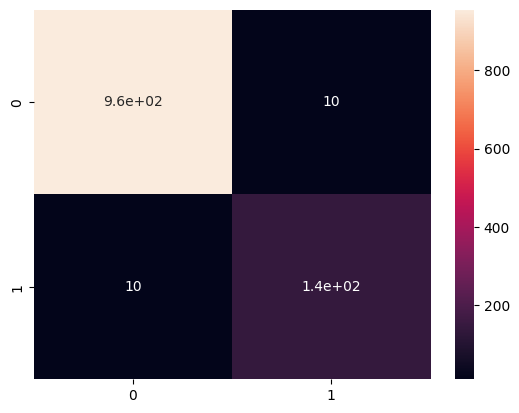

In [7]:
"""### Data Modeling

**Splitting the Dataset into Training and Testing Set**
"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

"""### Model Building

**Creating the Models**
"""

# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

"""**Prediction**"""

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

"""### Model Testing

**Testing the Model**
"""

# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, pred3)

import seaborn as sns
sns.heatmap(cm, annot=True)

report1 = classification_report(Y_test, pred1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, pred2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, pred3)
print("Classification Report for MNB \n", report3)

In [9]:
### Saving Models

filename = "RFC.pkl"
pickle.dump(model1, open(filename, 'wb'))
filename = "DTC.pkl"
pickle.dump(model2, open(filename, 'wb'))
filename = "MNB.pkl"
pickle.dump(model3, open(filename, 'wb'))
print("Saved all Models")

Saved all Models


In [23]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [12]:
!git config --global user.email "divyansh.poddar04@gmail.com"
!git config --global user.name "divyanshpoddar"

In [13]:
!git clone https://github.com/divyanshpoddar/EmailSpamDetection.git

Cloning into 'EmailSpamDetection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [15]:
!cp /content/drive/MyDrive/Colab\ Notebooks/Task4.ipynb /content/EmailSpamDetection/

In [16]:
%cd /content/EmailSpamDetection/

/content/EmailSpamDetection


In [17]:
!git add Task4.ipynb